In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats as st
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Загрузка датасетов из репозитория github

In [406]:
cardio_alco = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/cardio_alco.csv', sep=';')
cardio_base = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/cardio_base.csv')

covid = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/covid_data.csv', parse_dates=['date'])

In [3]:
# Note: In the original file Age is in days, we should calculate with age in years rounded down.
cardio_base['age'] = cardio_base['age'].transform(lambda x: int(math.floor(x/365)), axis=0)

# Question 1:
Which country has the 3rd death rate? Death rate: total number of death per million inhabitants.\n",
- [ ] Italy
- [x] **Andorra**
- [ ] USA
- [ ] Belgium
- [ ] Spain

In [4]:
covid_death_rate = covid.groupby('location').agg(
    total_death=pd.NamedAgg('new_deaths', 'sum'), 
    inhabitants=pd.NamedAgg('population', 'max'),
    )

covid_death_rate['death_rate'] = covid_death_rate['total_death']/(covid_death_rate['inhabitants']/1e6)

covid_death_rate.sort_values('death_rate', ascending=False).head(3)


,total_death,inhabitants,death_rate
location,,,
San Marino,42,33938.0,1237.550828
Belgium,9619,11589616.0,829.967102
Andorra,51,77265.0,660.066007


## Answer: 
Andorra

---
# Question 2

How tall are the tallest 1% of people?
- [ ] They are taller than 186 cm
- [ ] They are taller than 175 cm
- [ ] They are taller than 147 cm
- [x] **They are taller than 184 cm**
- [ ] They are taller than 191 cm

In [18]:
cardio_base['height'].quantile(0.99)

184.0

## Answer: 
They are taller than 184 cm

---
# Question 3

Which two features have the highest spearman rank correlation?
- [ ] Age and weight
- [ ] Age and blood preasure
- [x] **Blood preasure levels (ap_hi, ap_low)**
- [x] **Gender and height**

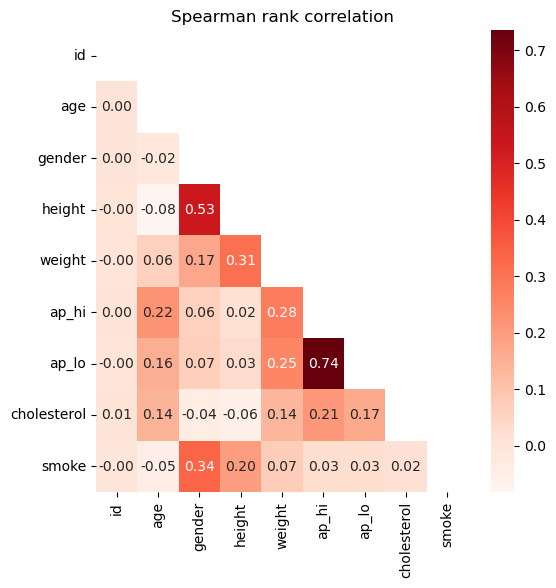

In [59]:
spearman_corr = cardio_base.corr(method='spearman')
mask = pd.DataFrame(np.triu(np.ones_like(spearman_corr)), index=spearman_corr.index, columns=spearman_corr.columns).replace({0: False, 1: True})

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Spearman rank correlation")
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap="Reds", mask=mask);

## Answer: 
- Blood preasure levels (ap_hi, ap_low) 
- Gender and height

---
# Question 4
Do people over 50 have higher cholesterol levels than the rest?
- [ ] Yes, their cholesterol level is 29% higher on average
- [x] **No, it's about the same**
- [ ] No, people over 50 have 7% lower cholesterol level
- [ ] Yes, their cholesterol level is 14% higher on average
- [ ] Yes, their cholesterol level is 19% higher on average

In [100]:
cardio_base['cholesterol'].where(cardio_base['age'] > 50).mean() / cardio_base['cholesterol'].mean() - 1

0.04718033578232861

## Answer: 
No, it's about the same

---
# Question 5
How much heavier the age group with the highest average weight than the age group with the lowest average weight?
- [ ] 45% havier
- [x] **28% havier**
- [ ] 13% havier
- [ ] 87% havier
- [ ] 9% havier

In [129]:
heavier_age_group = cardio_base.groupby('age')['weight'].mean().agg(['min', 'max'])
heavier_age_group['max'] / heavier_age_group['min'] - 1

0.2859952671226089

## Answer: 
28% havier

---
# Question 6
Which of the following statements is true with 95% confidence?
- [ ] Smokers have higher blood preassure than non-smokers
- [x] **Smokers have higher cholisterol level than non-smokers**
- [ ] Smokers weight less than non-smokers
- [x] **Men have higher blood preassure than women**

In [6]:
alpha = .05

### Smokers have higher blood preassure than non-smokers
False

In [26]:
print('''H0: Smokers and non-smokers have the same blood pressure\nH1: Smokers have higher blood preassure than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['ap_hi'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['ap_hi'] # non-smokeres

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")


if results.pvalue < alpha / 2 and sample_1 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same blood pressure
H1: Smokers have higher blood preassure than non-smokers
p-значение:  0.461244784929987
p-значение / 2:  0.2306223924649935
Smokers: 128.361
Non-smokers: 128.861
Do not reject null hypothesis H0


In [27]:
print('''H0: Smokers and non-smokers have the same blood pressure\nH1: Smokers have higher blood preassure than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['ap_lo'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['ap_lo'] # non-smokeres

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")


if results.pvalue < alpha / 2 and sample_1 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same blood pressure
H1: Smokers have higher blood preassure than non-smokers
p-значение:  0.13044186949533218
p-значение / 2:  0.06522093474766609
Smokers: 99.775
Non-smokers: 96.327
Do not reject null hypothesis H0


### Smokers have higher cholisterol level than non-smokers
True

In [21]:
print('''H0: Smokers and non-smokers have the same cholisterol level\nH1: Smokers have higher cholisterol level than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['cholesterol'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['cholesterol'] # non-smokeres
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same cholisterol level
H1: Smokers have higher cholisterol level than non-smokers
p-значение:  0.006222972569800228
p-значение / 2:  0.003111486284900114
Smokers: 1.390
Non-smokers: 1.365
Reject null hypothesis H0


### Smokers weight less than non-smokers
False

In [22]:
print('''H0: Smokers and non-smokers have the same weight\nH1: Smokers weight less than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['weight'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['weight'] # non-smokeres
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same weight
H1: Smokers weight less than non-smokers
p-значение:  1.6785734402177582e-65
p-значение / 2:  8.392867201088791e-66
Smokers: 77.344
Non-smokers: 73.902
Do not reject null hypothesis H0


### Men have higher blood preassure than women
True

In [28]:
print('''H0: Men and women have the same blood pressure\nH1: Men have higher blood pressure than women''')
sample_1 = cardio_base[cardio_base['gender'] == 1]['ap_hi'] # women
sample_2 = cardio_base[cardio_base['gender'] == 2]['ap_hi'] # men
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Men and women have the same blood pressure
H1: Men have higher blood pressure than women
p-значение:  0.1038392595181402
p-значение / 2:  0.0519196297590701
Smokers: 128.139
Non-smokers: 130.079
Do not reject null hypothesis H0


Too small distinguish between p-value and alpha. So I'd reject H0 here.

In [29]:
print('''H0: Men and women have the same blood pressure\nH1: Men have higher blood pressure than women''')
sample_1 = cardio_base[cardio_base['gender'] == 1]['ap_lo'] # women
sample_2 = cardio_base[cardio_base['gender'] == 2]['ap_lo'] # men
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Men and women have the same blood pressure
H1: Men have higher blood pressure than women
p-значение:  0.00013735011856314677
p-значение / 2:  6.867505928157339e-05
Smokers: 94.523
Non-smokers: 100.552
Reject null hypothesis H0


## Answer: 
The fallowing statements are True:
- Smokers have higher cholisterol level than non-smokers
- Men have higher blood preassure than women

---
# Question 7
What is the probabilyty that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants?
- [ ] 92%
- [x] **88%**
- [ ] 71%
- [ ] 54%
- [ ] 39%

In [457]:
covid_beds = covid.copy()

# Remove rows are relating to World at all (not to a specific country).
# and countries where we do not know about hospital beds number
covid_beds = covid_beds[~covid_beds['location'].isin(['World'])]
covid_beds = covid_beds[covid_beds['hospital_beds_per_thousand'].notna()]

In [458]:
cond = covid_beds['gdp_per_capita'] > 10000
covid_beds['gdp_A'] = '<= 10K'
covid_beds.loc[:, 'gdp_A'] = covid_beds['gdp_A'].mask(cond, '> 10K')

cond = covid_beds['hospital_beds_per_thousand'] >= 5
covid_beds['beds_B'] = '< 5'
covid_beds.loc[:, 'beds_B'] = covid_beds['beds_B'].mask(cond, '>= 5')

Here we use Bayes' Theorem
$$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$$
- A, B	-	events
- P(A|B)	-	probability of A given B is true
- P(B|A)	-	probability of B given A is true
- P(A), P(B)	-	the independent probabilities of A and B

What is the probabilyty that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants?
- A = {a country has GDP over $10 000}
- B = {a country has at least 5 hospital beds per 1000}
- P(A|B) = (posterior probability) the probability that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants
- P(A) = (prior probability)the probability that a country has GDP over $10 000
- P(B|A) = (likelihood) the probability that a country has at least 5 hospital beds per 1000 inhabitants given that it has had GDP over $10 000
- P(B) = (evidence) the probability that a country has at least 5 hospital beds per 100 (regardless its GDP) 
$$P(B) = \sum_{i=1}^n{P(B|A_i)*P(A_i)}$$

In [459]:
# P(A)
P_A = covid_beds['gdp_A'].value_counts(normalize=True)
# P(B)
P_B =covid_beds['beds_B'].value_counts(normalize=True)
# P(B|A)
P_B_and_A = covid_beds.groupby('gdp_A')['beds_B'].value_counts(normalize=True).sort_index(ascending=False)

We would like to know what is the probability that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants.

So, what have we already known?

If we did not know anything about hospital beds in the country we would say that the probability that it has GDP over $10 000 is **P(A)** - a prior probability.


In [460]:
print('P(A)')
P_A

P(A)


> 10K     0.665297
<= 10K    0.334703
Name: gdp_A, dtype: float64

But we just have known that the country has at least 5 hospital beds per 1000 inhabitants.

**P(A|B) = P(B|A) * P(A) / P(B)**

If a country has at least 5 hospital beds per 1000 inhabitants **P(B)** there are two posibilities **P(B|A)**: 
- either it has GDP over $10 000 - **P('>= 5'|'> 10K')**,
- or its GDP is equal or less than $10 000 - **P('>= 5'|'<= 10K')**.

In [461]:
print('P(B|A)')
P_B_and_A

P(B|A)


gdp_A   beds_B
> 10K   >= 5      0.237330
        < 5       0.762670
<= 10K  >= 5      0.079018
        < 5       0.920982
Name: beds_B, dtype: float64

In [467]:
print(f'''
P('>= 5'|'> 10K') = {P_B_and_A.loc[('> 10K', '>= 5')]:.6f} 
P('>= 5'|'<= 10K') = {P_B_and_A.loc[('<= 10K', '>= 5')]:.6f}''')


P('>= 5'|'> 10K') = 0.237330 
P('>= 5'|'<= 10K') = 0.079018


In [468]:
print(f'''
P(B) = sum(P(B|A) * P(A))
P('>= 5') = P('>= 5'|'> 10K') * P('> 10K') + P('>= 5'|'<= 10K') * P('<= 10K')
P('>= 5') = {P_B_and_A.loc[('> 10K', '>= 5')]:.6f} * {P_A['> 10K']:.6f} + {P_B_and_A.loc[('<= 10K', '>= 5')]:.6f} * {P_A['<= 10K']:.6f} = {P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'] + P_B_and_A.loc[('<= 10K', '>= 5')] * P_A['<= 10K']:.6f}''')


P(B) = sum(P(B|A) * P(A))
P('>= 5') = P('>= 5'|'> 10K') * P('> 10K') + P('>= 5'|'<= 10K') * P('<= 10K')
P('>= 5') = 0.237330 * 0.665297 + 0.079018 * 0.334703 = 0.184342


In [464]:
print('P(B)')
P_B

P(B)


< 5     0.815658
>= 5    0.184342
Name: beds_B, dtype: float64

In [469]:
print(f'''Thus, the probatility, that the country has GPR over 10K given that it has at least 5 hospital beds per 1000 inhabitants is:
P(A|B) = P(B|A) * P(A) / P(B)
P('> 10K'|'> 5') = P('>= 5'|'> 10K) * P('> 10K') / P('>= 5')
P(B|A) * P(A) = P('>= 5'|'> 10K) * P('> 10K') = {round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'], 2)}
P(B) = P('>= 5') = {round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'] + P_B_and_A.loc[('<= 10K', '>= 5')] * P_A['<= 10K'], 2)}
P(A|B) = {round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'], 2) / round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'] + P_B_and_A.loc[('<= 10K', '>= 5')] * P_A['<= 10K'], 2)}
''')

Thus, the probatility, that the country has GPR over 10K given that it has at least 5 hospital beds per 1000 inhabitants is:
P(A|B) = P(B|A) * P(A) / P(B)
P('> 10K'|'> 5') = P('>= 5'|'> 10K) * P('> 10K') / P('>= 5')
P(B|A) * P(A) = P('>= 5'|'> 10K) * P('> 10K') = 0.16
P(B) = P('>= 5') = 0.18
P(A|B) = 0.888888888888889



The same conclusions we can make with confusion_matrix.

In [466]:
confusion_matrix = pd.crosstab(covid_beds['beds_B'], covid_beds['gdp_A'], normalize=True)
confusion_matrix.loc['sum', :] = confusion_matrix.sum(axis=0)
confusion_matrix.loc[:, 'sum'] = confusion_matrix.sum(axis=1)
confusion_matrix.style.applymap(lambda x: f"background-color: #e6ffe6; color: green;", subset=('>= 5', ['> 10K', 'sum'])).format('{:.2f}')

gdp_A,<= 10K,> 10K,sum
beds_B,,,
< 5,0.31,0.51,0.82
>= 5,0.03,0.16,0.18
sum,0.33,0.67,1.00


## Answer: 
88%

---
# Question 8
What is the F1 score of the following statement: 

Countries, where more than 20% population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the necessary information is missing!
- [ ] 0.15
- [ ] 0.73
- [ ] 0.87
- [x] **0.18**
- [ ] 0.21

In [59]:
covid_fscore = covid.groupby('location').agg(
    aged_65_older_percent=pd.NamedAgg('aged_65_older_percent', 'max'), 
).join(covid_death_rate['death_rate'])
covid_fscore = covid_fscore[covid_fscore['aged_65_older_percent'].notna()]
covid_fscore['aged_65_older_percent'] = covid_fscore['aged_65_older_percent'].astype('float')

cond = covid_fscore['aged_65_older_percent'] > 20
covid_fscore.loc[:, 'aged_65_older_percent'] = covid_fscore['aged_65_older_percent'].mask(cond, 1)
covid_fscore.loc[:, 'aged_65_older_percent'] = covid_fscore['aged_65_older_percent'].where(cond, 0)

cond = covid_fscore['death_rate'] > 50
covid_fscore.loc[:, 'death_rate'] = covid_fscore['death_rate'].mask(cond, 1)
covid_fscore.loc[:, 'death_rate'] = covid_fscore['death_rate'].where(cond, 0)

In [68]:
# сountries, where more than 20% population is over 65 years old
y_pred = covid_fscore['aged_65_older_percent']
# have death rates over 50 per million inhabitants
y_true = covid_fscore['death_rate']

In [81]:
# confusion_matrix returns tn, fp, fn, tp
cf = pd.DataFrame(
    confusion_matrix(y_true, y_pred), 
    columns=pd.MultiIndex.from_tuples([(i, j) for j in [False, True] for i in ['сountries, where more than 20% population is over 65 years old']]),
    index=pd.MultiIndex.from_tuples([(i, j) for j in [False, True] for i in ['have death rates over 50 per million inhabitants']]),
    )
cf = cf.reindex(sorted(cf.index, reverse=True), axis=0).reindex(sorted(cf.columns, reverse=True), axis=1).T
cf

have death rates over 50 per million inhabitants  \
                                                                                                    True    
сountries, where more than 20% population is ov... True                                                 4   
                                                   False                                               33   

                                                                
                                                         False  
сountries, where more than 20% population is ov... True      3  
                                                   False   144

In [87]:
# Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
# Precision = tp / (tp + fp)
print(f"""Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
Precision = tp / (tp + fp)
Precision = {precision_score(y_true, y_pred, average='binary'):.2f}

Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. 
Recall = tp / (tp + fn)
Recall = {recall_score(y_true, y_pred, average='binary'):.2f}

f1-score is the harmonic mean of a precision and recall values. 
f1-score = 2 x (Precision x Recall) / (Precision + Recall)
f1-score = {f1_score(y_true, y_pred, average='binary'):.2f}
""")

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
Precision = tp / (tp + fp)
Precision = 0.57

Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. 
Recall = tp / (tp + fn)
Recall = 0.11

f1-score is the harmonic mean of a precision and recall values. 
f1-score = 2 x (Precision x Recall) / (Precision + Recall)
f1-score = 0.18



## Answer: 
0.18

---
# Question 9: 
Are men are more likely to be smoker than women? The data contains information to identify gender IDs!
- [x] **Yes, men are 12x more likely to be smokers**
- [ ] Yes, men are 7x more likely to be smokers
- [ ] Similar portion of men and women are smokers
- [ ] No, women are 12x more likely to be smokers

## Identifying gender


We can see marks 1 and 2 in column "gender" but we don't know if mark 1 represents men or women. 

We also know that men, on average, are about 15 percent to 20 percent larger than women.

So we can estimate average height for gender 1 and 2.

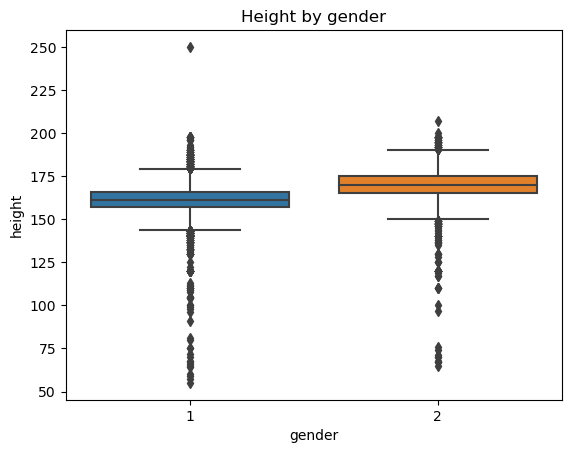

In [97]:
df = cardio_base
ax = sns.boxplot(x=df['gender'], y=cardio_base['height'])
ax.set_title('Height by gender');

Thus, we can conclude that mark 1 is used for female, 2 - for male.

## Probability calculation

Let's say we take a random person whose gender is male. What is the probability that he is a smoker?

Here we use Bayes' Theorem
$$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$$
- P(A|B) = P(smoker|men)
- P(A) = P(smoker)
- P(B) = P(men)
- P(B|A) = P(men|smoker)
$$P(smoker|men) = \frac{P(men|smoker)*P(smoker)}{P(men)}$$

In [201]:
P_A = cardio_base['smoke'].value_counts(normalize=True)
P_B = cardio_base['gender'].value_counts(normalize=True)
P_BA = cardio_base[cardio_base['smoke'] == 1]['gender'].value_counts(normalize=True)

In [247]:
print(f"""If we don't know the gender we would say that the probability that a person is a smoker equals P(A)
P(A) = P(smoker) - the probability to be a smoker regardless to gender
{P_A}
P(smoker) = {P_A.loc[1]:.6f}

Then we find out that the person is a MAN.
P(B) = P(men) - the probability of choosing a man from the whole group
{P_B}
P(men) = {P_B.loc[2]:.6f}

Distributon of men and women among smokers
{P_BA}
P(B|A) = P(men|smoker) the probability that a random smoker is a man
P(men|smoker) = {P_BA.loc[2]:.6f}
P(men|smoker) * P(smoker) = {P_BA.loc[2]:.6f} * {P_A.loc[1]:.6f} = {P_BA.loc[2] * P_A.loc[1]:.6f}

The probability that a random man is a smoker P(A|B) = P(smoker|men)
P(smoker|men) = {P_BA.loc[2]:.6f} * {P_A.loc[1]:.6f} / {P_B.loc[2]:.6f} = {P_BA.loc[2]*P_A.loc[1]:.6f} / {P_B.loc[2]:.6f} = {P_BA.loc[2] * P_A.loc[1] / P_B.loc[2]:.6f}
""")
P_smoker_men = P_BA.loc[2] * P_A.loc[1] / P_B.loc[2]

If we don't know the gender we would say that the probability that a person is a smoker equals P(A)
P(A) = P(smoker) - the probability to be a smoker regardless to gender
0    0.911871
1    0.088129
Name: smoke, dtype: float64
P(smoker) = 0.088129

Then we find out that the person is a MAN.
P(B) = P(men) - the probability to choose a man from the whole group
1    0.650429
2    0.349571
Name: gender, dtype: float64
P(men) = 0.349571

Distributon of men and women among smokers
2    0.868212
1    0.131788
Name: gender, dtype: float64
P(B|A) = P(men|smoker) the probability that a random smoker is a man
P(men|smoker) = 0.868212
P(men|smoker) * P(smoker) = 0.868212 * 0.088129 = 0.076514

The probability that a random man is a smoker P(A|B) = P(smoker|men)
P(smoker|men) = 0.868212 * 0.088129 / 0.349571 = 0.076514 / 0.349571 = 0.218880



In [246]:
print(f"""If we don't know the gender we would say that the probability that a person is a smoker equals P(A)
P(A) = P(smoker) - the probability to be a smoker regardless to gender
{P_A}
P(smoker) = {P_A.loc[1]:.6f}

Then we find out that the person is a WOMAN.
P(B) = P(women) - the probability of choosing a woman from the whole group
{P_B}
P(women) = {P_B.loc[1]:.6f}

Distributon of men and women among smokers
{P_BA}
P(B|A) = P(women|smoker) the probability that a random smoker is a woman
P(women|smoker) = {P_BA.loc[1]:.6f}
P(women|smoker) * P(smoker) = {P_BA.loc[1]:.6f} * {P_A.loc[1]:.6f} = {P_BA.loc[1] * P_A.loc[1]:.6f}

The probability that a random man is a smoker P(A|B) = P(smoker|men)
P(smoker|women) = {P_BA.loc[1]:.6f} * {P_A.loc[1]:.6f} / {P_B.loc[1]:.6f} = {P_BA.loc[1]*P_A.loc[1]:.6f} / {P_B.loc[1]:.6f} = {P_BA.loc[1] * P_A.loc[1] / P_B.loc[1]:.6f}
""")
P_smoker_women = P_BA.loc[1] * P_A.loc[1] / P_B.loc[1]

If we did't know the gender we would say that the probability that a person is a smoker equals P(A)
P(A) = P(smoker) - the probability to be a smoker regardless to gender
0    0.911871
1    0.088129
Name: smoke, dtype: float64
P(smoker) = 0.088129

Then we find out that the person is a WOMAN.
P(B) = P(women) - the probability to choose a woman from the whole group
1    0.650429
2    0.349571
Name: gender, dtype: float64
P(women) = 0.650429

Distributon of men and women among smokers
2    0.868212
1    0.131788
Name: gender, dtype: float64
P(B|A) = P(women|smoker) the probability that a random smoker is a woman
P(women|smoker) = 0.131788
P(women|smoker) * P(smoker) = 0.131788 * 0.088129 = 0.011614

The probability that a random man is a smoker P(A|B) = P(smoker|men)
P(smoker|women) = 0.131788 * 0.088129 / 0.650429 = 0.011614 / 0.650429 = 0.017856



In [250]:
print(f"The proportion is {P_smoker_men / P_smoker_women:.0f}")

The proportion is 12


## Answer: 
Yes, men are 12x more likely to be smokers

---
# Question 10: 
Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. 
Fit an exponential function (y = Ae^(Bx)) to this set to express cummulative cases as function of days passed, by minimizing squared loss. 
What is the difference between the exponential curve and the total number of real cases on 2020-03-20?
- [ ] 11756
- [ ] 37414
- [ ] 187963
- [ ] ~0
- [ ] 9785

In [488]:
covid_italy = covid.copy()
covid_italy = covid_italy[(covid_italy['location'] == 'Italy') & (covid_italy['date'] >= '2020-02-28') & (covid_italy['date'] <= '2020-03-20')]
covid_italy['cum_cases'] = covid_italy['new_cases'].cumsum()

In [489]:
x = np.arange(0, covid_italy.shape[0])
y = covid_italy['cum_cases']
p = np.polyfit(x, np.log(y), 1)
p

array([0.22133005, 6.36005586])

In [490]:
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
print(f"a = {a}\nb = {b}")

a = 578.2786581652114
b = 0.22133004576497883


In [491]:
covid_italy['fitted_cases'] = [a * np.exp(b * i) for i in x]

In [492]:
covid_italy.tail()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cum_cases,fitted_cases
10764,Italy,2020-03-16,2823,370,60461828.0,23.021,35220.084,3.18,23580,24901.084558
10765,Italy,2020-03-17,4000,347,60461828.0,23.021,35220.084,3.18,27580,31069.959032
10766,Italy,2020-03-18,3526,347,60461828.0,23.021,35220.084,3.18,31106,38767.080687
10767,Italy,2020-03-19,4207,473,60461828.0,23.021,35220.084,3.18,35313,48371.050101
10768,Italy,2020-03-20,5322,429,60461828.0,23.021,35220.084,3.18,40635,60354.260534


In [493]:
covid_italy[covid_italy['date'] == '2020-03-20']['cum_cases'] - covid_italy[covid_italy['date'] == '2020-03-20']['fitted_cases']

10768   -19719.260534
dtype: float64

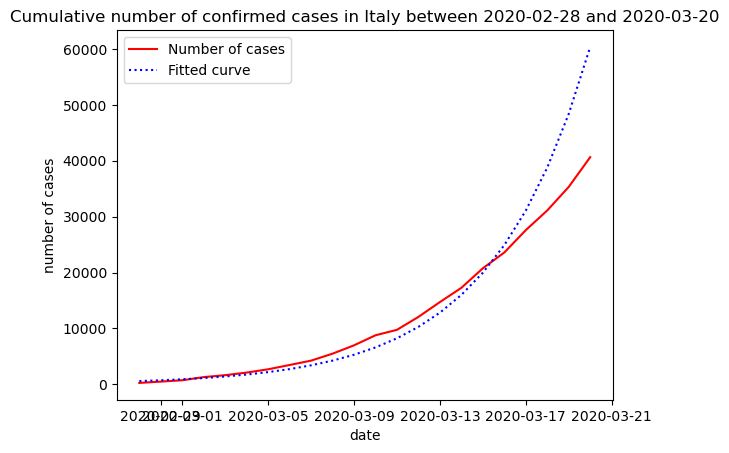

In [496]:
ax = plt.axes()
ax.plot(covid_italy['date'], covid_italy['cum_cases'], color='r', label='Number of cases')
ax.plot(covid_italy['date'], covid_italy['fitted_cases'], 'b:', label='Fitted curve')
ax.set(
    title='Cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20', 
    xlabel='date', 
    ylabel='number of cases'
    )
ax.legend();

## Answer: 
19719

---
# Question 11: 
When did the difference in the total number of confirmed cases between Italy and Germaty become more than 10 000?

Second dataset COVID-19 cases. This dataset contains daily COVID-19 cases for all countries in the world. Each row represents a calendar day. The rows also contains some simple information about the countries, like population, percentage of the population over 65, GDP, and hospital beds per 1000 inhabitants. 
- [ ] 2020-02-28
- [ ] 2020-02-29
- [ ] 2020-03-16
- [x] **2020-03-12**
- [ ] 2020-03-01

In [505]:
covid_italy_germany = covid.copy()
covid_italy_germany = covid_italy_germany[covid_italy_germany['location'].isin(['Italy', 'Germany'])]
covid_italy_germany = pd.pivot_table(covid_italy_germany, values='new_cases', columns='location', index='date').cumsum()
covid_italy_germany['difference'] = abs(covid_italy_germany['Germany'] - covid_italy_germany['Italy'])

In [536]:
covid_italy_germany[covid_italy_germany['difference'] > 10e3].head(1)

location,Germany,Italy,difference
date,,,
2020-03-12,1567,12462,10895


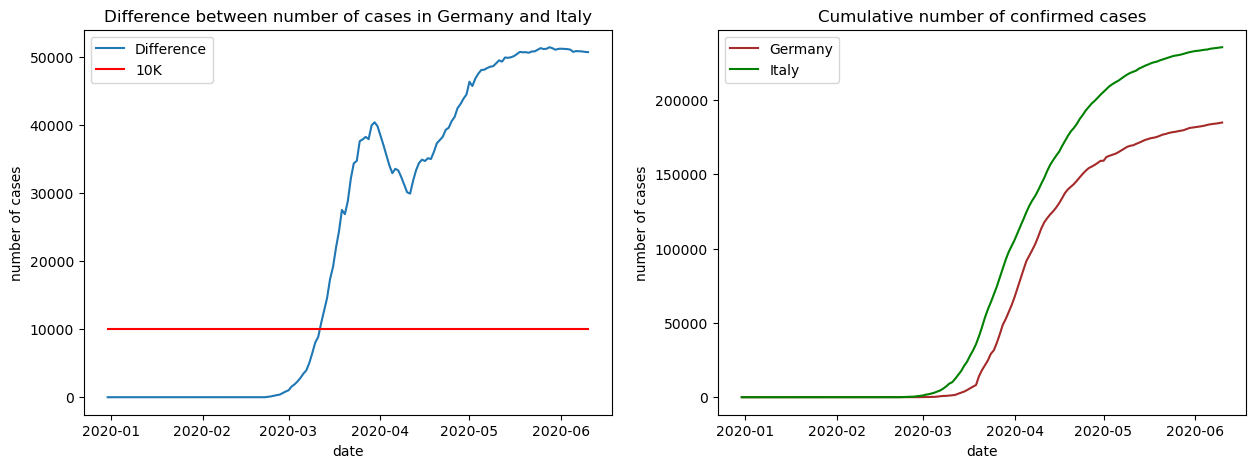

In [534]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5),)

ax[0].plot(covid_italy_germany.index, covid_italy_germany['difference'], label='Difference')
ax[0].plot(covid_italy_germany.index, [10000]*covid_italy_germany.shape[0], color='r', label='10K')
ax[0].set(
    title='Difference between number of cases in Germany and Italy', 
    xlabel='date', 
    ylabel='number of cases'
    )
ax[0].legend()

ax[1].plot(covid_italy_germany.index, covid_italy_germany['Germany'], color='brown', label='Germany')
ax[1].plot(covid_italy_germany.index, covid_italy_germany['Italy'], color='green', label='Italy')
ax[1].set(
    title='Cumulative number of confirmed cases', 
    xlabel='date', 
    ylabel='number of cases'
    )
ax[1].legend();

## Answer: 
2020-03-12

---
# Question 12: 
What percentage of people are more than 2 standard deviations far from the average height?
- [ ] 5%
- [ ] 3%
- [ ] 2%
- [ ] 7%
- [ ] 11%

## Answer: 
?